In [1]:
import pickle
import numpy as np


In [2]:
with open("train_qa220120145526-220818-175629.txt", "rb") as fp:
    train_data = pickle.load(fp)

In [27]:
train_data


In [7]:
with open("test_qa220120145430-220818-175426 (1).txt", "rb") as fp:
    test_data = pickle.load(fp)

In [8]:
test_data

In [308]:
len(test_data)

1000

In [309]:
len(train_data)

10000

In [9]:
' '.join(train_data[0][0])


'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]


'no'

In [12]:
vocab = set()

In [13]:
all_data = train_data + test_data

In [16]:
all_data

In [17]:
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [18]:
vocab.add('yes')
vocab.add('no')

In [19]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [20]:
len(vocab)

37

In [21]:
vocab_length = len(vocab)+1
print(vocab_length)

38


In [24]:
for data in all_data:
    print(data)
    print("\n")

In [322]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [323]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [324]:
#vectorise

In [325]:
vocab


{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [25]:
pip install tensorflow

In [327]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [328]:
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


In [329]:
tokenizer = Tokenizer(filters = [])


In [330]:
tokenizer.fit_on_texts(vocab)

In [331]:
tokenizer.word_index

{'kitchen': 1,
 'travelled': 2,
 'mary': 3,
 'went': 4,
 '.': 5,
 'sandra': 6,
 'no': 7,
 'john': 8,
 'office': 9,
 'apple': 10,
 'to': 11,
 'bedroom': 12,
 'discarded': 13,
 'yes': 14,
 'got': 15,
 'journeyed': 16,
 'back': 17,
 'left': 18,
 'up': 19,
 'down': 20,
 'bathroom': 21,
 'is': 22,
 'garden': 23,
 'took': 24,
 'there': 25,
 'in': 26,
 'moved': 27,
 'dropped': 28,
 'football': 29,
 'picked': 30,
 'put': 31,
 'milk': 32,
 'the': 33,
 '?': 34,
 'daniel': 35,
 'grabbed': 36,
 'hallway': 37}

In [332]:
train_story_text = []
train_question_text = []
train_answers = []
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    

In [333]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [334]:
len(train_story_seq)

10000

In [335]:
len(train_story_text)

10000

In [145]:
train_story_seq

In [336]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    X = [] #stories
    Xq = [] #querries
    Y = [] #ans
    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) +1)
        y[word_index[answer]] =1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return(pad_sequences(X, maxlen = max_story_len) ,
           pad_sequences(Xq, maxlen = max_question_len) , 
           np.array(Y) )

          
          
        

In [337]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [338]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [339]:
inputs_train


array([[ 0,  0,  0, ..., 33, 12,  5],
       [ 0,  0,  0, ..., 33, 37,  5],
       [ 0,  0,  0, ..., 33, 21,  5],
       ...,
       [ 0,  0,  0, ..., 33, 12,  5],
       [ 0,  0,  0, ..., 32, 25,  5],
       [ 0,  0,  0, ..., 10, 25,  5]])

In [340]:
queries_test

array([[22,  8, 26, 33,  1, 34],
       [22,  8, 26, 33,  1, 34],
       [22,  8, 26, 33, 23, 34],
       ...,
       [22,  3, 26, 33, 12, 34],
       [22,  6, 26, 33, 23, 34],
       [22,  3, 26, 33, 23, 34]])

In [341]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [342]:
queries_test

array([[22,  8, 26, 33,  1, 34],
       [22,  8, 26, 33,  1, 34],
       [22,  8, 26, 33, 23, 34],
       ...,
       [22,  3, 26, 33, 12, 34],
       [22,  6, 26, 33, 23, 34],
       [22,  3, 26, 33, 23, 34]])

In [343]:
tokenizer.word_index['yes']

14

In [344]:
tokenizer.word_index['no']

7

In [345]:
from keras.models import Sequential, Model

In [346]:
from tensorflow.keras.layers import Embedding

In [347]:
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [348]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))


In [349]:
#input encoder m

In [350]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_length, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

In [351]:
#input encoder c

In [352]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_length, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3))

In [353]:
# question encoder 


In [354]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_length, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

In [355]:
# encode the sequence


In [356]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [357]:
match = dot([input_encoded_m, question_encoded], axes =(2,2))

In [358]:
match = Activation('softmax')(match)

In [359]:
response = add([match,input_encoded_c ])
response = Permute((2,1))(response)

In [360]:
#concatenate

In [361]:
answer = concatenate([response,question_encoded])

In [362]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [363]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_length)(answer)

In [364]:
answer = Activation('softmax')(answer)

In [365]:
model = Model([input_sequence, question], answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [366]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_5 (Sequential)      (None, None, 64)     2432        ['input_6[0][0]']                
                                                                                                  
 sequential_7 (Sequential)      (None, 6, 64)        2432        ['input_7[0][0]']                
                                                                                            

In [367]:
history = model.fit([inputs_train, queries_train], answers_train, 
                   batch_size = 32, epochs = 150, validation_data = ([inputs_test, queries_test], answers_test)
                   )


Epoch 1/150
313/313 [==============================] - 9s 19ms/step - loss: 0.8867 - accuracy: 0.5027 - val_loss: 0.6972 - val_accuracy: 0.4970
Epoch 2/150
313/313 [==============================] - 5s 16ms/step - loss: 0.7018 - accuracy: 0.5011 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 3/150
313/313 [==============================] - 4s 14ms/step - loss: 0.6958 - accuracy: 0.4978 - val_loss: 0.6969 - val_accuracy: 0.4970
Epoch 4/150
313/313 [==============================] - 4s 13ms/step - loss: 0.6953 - accuracy: 0.5014 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 5/150
313/313 [==============================] - 5s 14ms/step - loss: 0.6942 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 6/150
313/313 [==============================] - 5s 14ms/step - loss: 0.6940 - accuracy: 0.5080 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 7/150
313/313 [==============================] - 4s 14ms/step - loss: 0.6949 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy:

313/313 [==============================] - 5s 15ms/step - loss: 0.1785 - accuracy: 0.9271 - val_loss: 0.5242 - val_accuracy: 0.8260
Epoch 114/150
313/313 [==============================] - 5s 15ms/step - loss: 0.1826 - accuracy: 0.9275 - val_loss: 0.5327 - val_accuracy: 0.8230
Epoch 115/150
313/313 [==============================] - 4s 13ms/step - loss: 0.1766 - accuracy: 0.9297 - val_loss: 0.5607 - val_accuracy: 0.8130
Epoch 116/150
313/313 [==============================] - 5s 15ms/step - loss: 0.1822 - accuracy: 0.9275 - val_loss: 0.5262 - val_accuracy: 0.8190
Epoch 117/150
313/313 [==============================] - 5s 15ms/step - loss: 0.1789 - accuracy: 0.9281 - val_loss: 0.5443 - val_accuracy: 0.8260
Epoch 118/150
313/313 [==============================] - 5s 14ms/step - loss: 0.1704 - accuracy: 0.9302 - val_loss: 0.5393 - val_accuracy: 0.8270
Epoch 119/150
313/313 [==============================] - 5s 15ms/step - loss: 0.1708 - accuracy: 0.9311 - val_loss: 0.5431 - val_accuracy:

In [368]:
import matplotlib.pyplot as plt


In [369]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0, 0.5, 'accuracy')

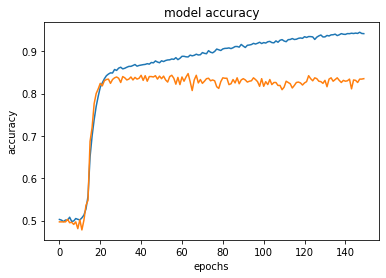

In [370]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [371]:
model.save("chatbot")

INFO:tensorflow:Assets written to: chatbot\assets


INFO:tensorflow:Assets written to: chatbot\assets


In [372]:
#evaluation on test set

In [373]:
model.load_weights("chatbot")

In [374]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 3ms/step


In [185]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [375]:
story = ' '.join(word for word in test_data[50][0])

In [377]:
story

'Mary journeyed to the kitchen . Daniel picked up the football there .'

In [378]:
querry = ' '.join(word for word in test_data[50][1])
querry

'Is Mary in the kitchen ?'

In [380]:
test_data[50][2]

'yes'

In [381]:
story = ' '.join(word for word in test_data[0][0])
story

'Mary got the milk there . John moved to the bedroom .'

In [382]:
querry = ' '.join(word for word in test_data[0][1])
querry

'Is John in the kitchen ?'

In [383]:
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("predicted answer is", k)
print("probablity of certainity ", pred_results[0][val_max])

predicted answer is no
probablity of certainity  0.9999852


In [388]:
story = ' '.join(word for word in test_data[13][0])
story

'John moved to the hallway . Sandra went to the bedroom . Sandra travelled to the garden . John got the football there . Daniel went back to the bedroom . Mary moved to the bathroom . Mary went to the kitchen . Sandra went to the hallway .'

In [389]:
querry = ' '.join(word for word in test_data[13][1])
querry

'Is Mary in the kitchen ?'

In [390]:
val_max = np.argmax(pred_results[13])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("predicted answer is", k)
print("probablity of certainity ", pred_results[13][val_max])

predicted answer is yes
probablity of certainity  0.9655147


In [489]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [462]:
#make our own story with the vocab available
story = 'Sandra travelled to the hallway . Mary picked the football . Daniel discarded the milk in the kitchen .'
story.split()

['Sandra',
 'travelled',
 'to',
 'the',
 'hallway',
 '.',
 'Mary',
 'picked',
 'the',
 'football',
 '.',
 'Daniel',
 'discarded',
 'the',
 'milk',
 'in',
 'the',
 'kitchen',
 '.']

In [463]:
my_question = 'Is Daniel in the kitchen ?'
my_question.split()

['Is', 'Daniel', 'in', 'the', 'kitchen', '?']

In [464]:
my_data = [(story.split(), my_question.split(), 'yes')]

In [465]:
my_story, my_question, my_answers = vectorize_stories(my_data)

In [466]:
pred_results = model.predict(([my_story, my_question]))

1/1 [==============================] - 0s 21ms/step


In [467]:
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("predicted answer is", k)
print("probablity of certainity ", pred_results[0][val_max])

predicted answer is yes
probablity of certainity  0.9693201


In [500]:
story = 'Mary journeyed to the bedroom . Sandra dropped the football there . John travelled to the garden .'
story.split()

['Mary',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'there',
 '.',
 'John',
 'travelled',
 'to',
 'the',
 'garden',
 '.']

In [501]:
my_question = 'Is John in the kitchen ?'
my_question.split()

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [502]:
my_data = [(story.split(), my_question.split(), 'no')]

In [503]:
my_story, my_question, my_answers = vectorize_stories(my_data)

In [504]:
pred_results = model.predict(([my_story, my_question]))

1/1 [==============================] - 0s 35ms/step


In [505]:
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print("predicted answer is", k)
print("probablity of certainity ", pred_results[0][val_max])

predicted answer is no
probablity of certainity  0.99983525
